Testing some 2D slices of 3D plots

In [ ]:
using IFSintegrals, Plots;

In [2]:
X = slice([0.0,0.0],[1.0,1.0],0.0,2,3)

([[0.0, 0.0, 0.0] [1.0, 0.0, 0.0]; [0.0, 0.5, 0.0] [1.0, 0.5, 0.0]; [0.0, 1.0, 0.0] [1.0, 1.0, 0.0]], [0.0, 1.0], [0.0, 0.5, 1.0])

Create IFS, as an array of similarities:

In [3]:
ρ = 0.41
IFS = [
    Similarity(ρ,[0,0])
    Similarity(ρ,[1-ρ,0])
    Similarity(ρ,[(1-ρ)/2,sqrt(3)*(1-ρ)/2])
    Similarity(ρ,[(1-ρ)/2,(1-ρ)/(2*sqrt(3))])
]
Γ = Attractor(IFS);

Set up the problem: 
$$S\phi = f \quad\text{on } \Gamma,$$ with wavenumber $k$, incident field $d$.

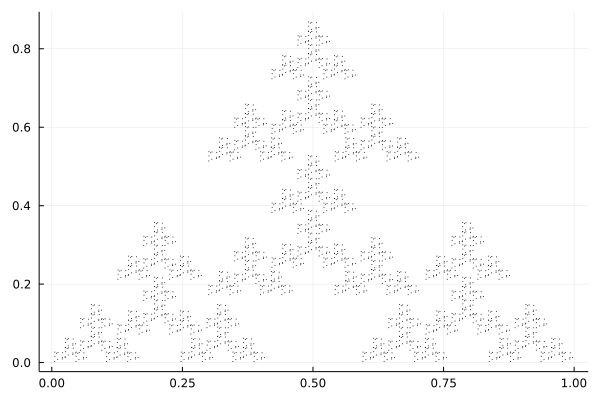

In [4]:
X = sketch_attractor(Γ);
scatter([X[j][1] for j=1:length(X)],[X[j][2] for j=1:length(X)],legend=:false,markerstrokewidth=0, markersize=0.1, markercolor="black")

In [15]:
k = 52.0
d = [0, 0, -1]
S = SingleLayer(Γ, k)
Sh = DiscreteBIO(S,0.005,0.001)
f(x) = exp(im*k*(d[1:2]'*x))
ϕ = Sh\f;

Constructing BEM system 100%|███████████████████████████| Time: 0:00:09


Now plot the solution in some slice of the domain:

In [18]:
XY0,x,y = slice([-0.25,-0.25],[1.25,1.0],-0.2,100,100)
Sₖϕ = single_layer_potential(k,ϕ)# returns function
uⁱ(x) = exp(im*k*(d'*x)) # define inc field in domain
uᵗ(x) = uⁱ(x) - Sₖϕ(x)

uᵗ (generic function with 1 method)

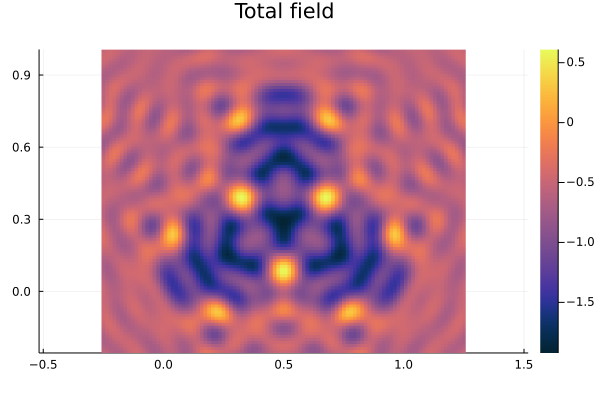

In [19]:
heatmap(x,y,real(uᵗ.(XY0)), aspect_ratio = 1, 
    title="Total field", legend=true, c = :thermal)